**Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix

**Importing the dataset**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/dataset/optimum_info/Optimum Info - ML Case Study - data.csv")
df

,DealerCode,Date,% Customer Pay Service,Current Ratio,Days Supply - New Vehicle,Days of Inventory (Parts),Dealer Loyalty,Dealer Service Retention,F&I New Car Gross PNVR,Floorplan Expense PNVR,...,Rent Expense PVR,SEI R3,Total Advertising Expenses PVR,Total Dealership Expenses - PVR,Used F&I per retail unit,Used to New Ratio,VolumnGrp,operationaldate,TerminationDate,Is the Dealer at Risk?
0,Dealer1,1/1/2018,32.29,1.67,114.41,116.05,58.27,53.20,1269.14,355.88,...,1000.01,964.10,537.96,5417.65,721.52,0.50,VG-4,7/1/1997,NaN,No
1,Dealer1,1/2/2018,45.87,1.66,199.71,126.01,57.41,53.69,1308.89,532.91,...,1344.28,956.30,664.14,7534.28,567.04,0.90,VG-4,7/1/1997,NaN,Yes
2,Dealer1,1/3/2018,42.89,1.71,106.07,109.95,57.65,53.33,1677.82,470.28,...,987.96,940.30,586.99,7317.52,930.59,0.68,VG-4,7/1/1997,NaN,Yes
3,Dealer1,1/4/2018,52.90,1.77,151.67,113.68,55.47,52.75,1152.25,354.66,...,1413.81,940.00,556.72,6395.38,-55.91,0.50,VG-5,7/1/1997,NaN,Yes
4,Dealer1,1/5/2018,45.78,1.85,108.37,101.80,54.93,47.19,992.67,332.90,...,1389.85,NaN,563.96,5781.98,254.60,0.33,VG-5,7/1/1997,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,Dealer23,1/11/2019,54.79,1.65,135.00,50.86,59.09,50.11,-1002.00,-481.02,...,719.05,918.52,604.12,4672.59,1199.30,1.39,VG-7,10/1/2010,NaN,No
648,Dealer23,1/12/2019,41.85,1.76,48.46,55.26,57.69,50.21,-603.31,-288.85,...,943.75,911.94,415.81,4601.69,1076.89,0.60,VG-7,10/1/2010,NaN,No
649,Dealer23,1/1/2020,56.55,1.51,96.67,52.19,60.00,49.79,-290.44,-55.29,...,963.83,896.67,535.47,6104.75,1308.84,1.38,VG-7,10/1/2010,NaN,No
650,Dealer23,1/2/2020,38.02,1.64,90.00,61.97,53.57,49.37,-582.60,-67.79,...,823.64,1000.00,671.12,4950.74,1225.78,1.00,VG-7,10/1/2010,NaN,No


**Countplot Visualization**


*   This is to check whether the dataset is balanced or imbalanced
*   It gives a clear picture about the number of categories in a column.



<Axes: xlabel='Is the Dealer at Risk?', ylabel='count'>

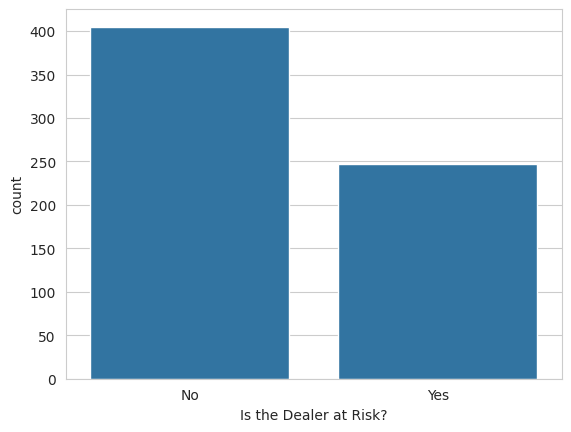

In [3]:
sns.set_style('whitegrid')
sns.countplot(x='Is the Dealer at Risk?',data=df)

**Categrical Features in the dataset**

In [4]:
cat_features = [feature for feature in df.columns if df[feature].dtypes=="O"]
print(cat_features)

['DealerCode', 'Date', 'VolumnGrp', 'operationaldate', 'TerminationDate', 'Is the Dealer at Risk?']


**Numerical Features in the dataset**

In [5]:
num_features = [feature for feature in df.columns if df[feature].dtypes!="O"]
print(num_features)

['% Customer Pay Service', 'Current Ratio', 'Days Supply - New Vehicle', 'Days of Inventory (Parts)', 'Dealer Loyalty', 'Dealer Service Retention', 'F&I New Car Gross PNVR', 'Floorplan Expense PNVR', 'KSI R3', 'F&I Penetration', 'Service Sales per Advisor', 'N.V. Sales per Sales Consultants', 'Net Profit (Loss) before taxes – current month', 'Net Profit BBIT % Sales (ROS)', 'Parts to Labor Ratio', 'Rent Expense PVR', 'SEI R3', 'Total Advertising Expenses PVR', 'Total Dealership Expenses - PVR', 'Used F&I per retail unit', 'Used to New Ratio']


**Missing Values in the dataset**


In [6]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Dealer Loyalty 0.0092  % missing values
SEI R3 0.2316  % missing values
VolumnGrp 0.0383  % missing values
TerminationDate 0.704  % missing values


<Axes: >

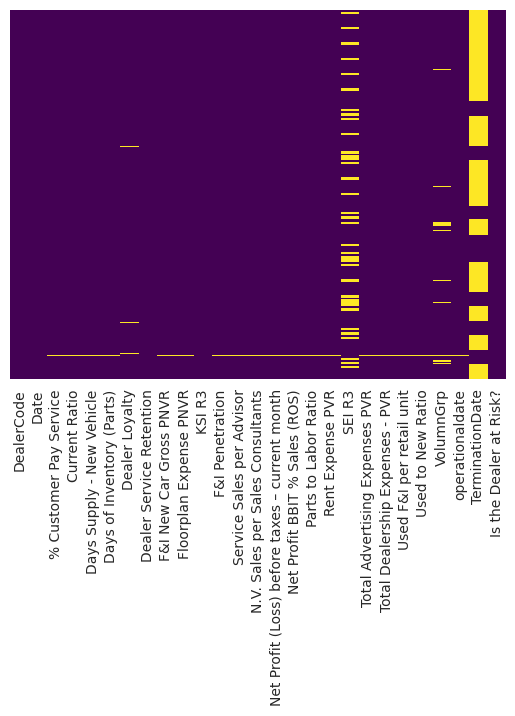

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Relationship of Categorical features with Target Variable**



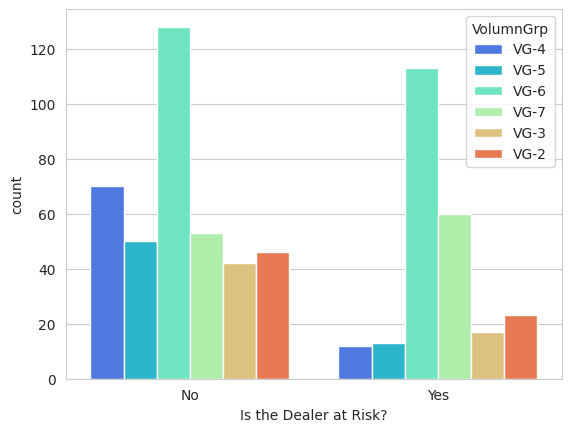

In [8]:
for i in features_with_na:
  if i != "TerminationDate" and i in cat_features:
    sns.set_style('whitegrid')
    sns.countplot(x='Is the Dealer at Risk?',hue=i,data=df,palette='rainbow')


**Discrete Values in the dataset**

In [9]:
discrete_feature=[feature for feature in num_features if len(df[feature].unique())<25 and feature not in ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


**Continous Values in the dataset**

In [10]:
continuous_feature=[feature for feature in num_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 21


**Distribution of Continous Variables in the dataset**

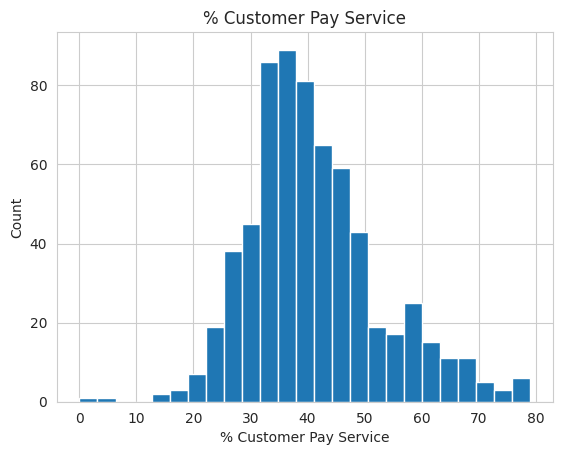

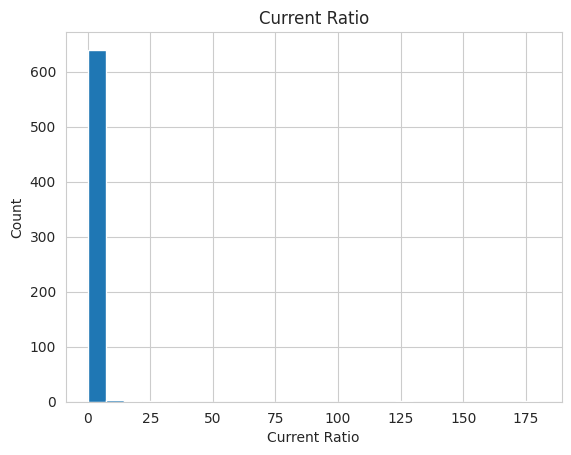

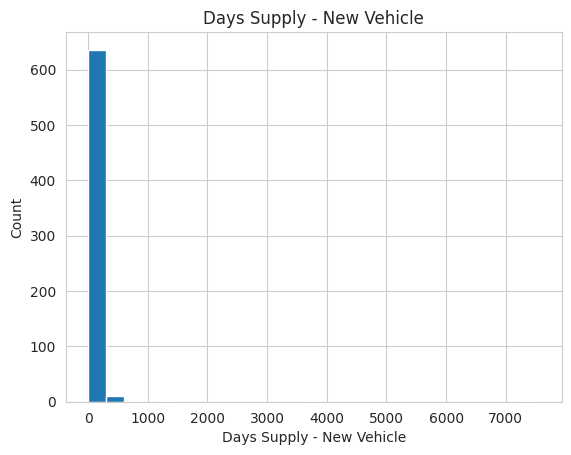

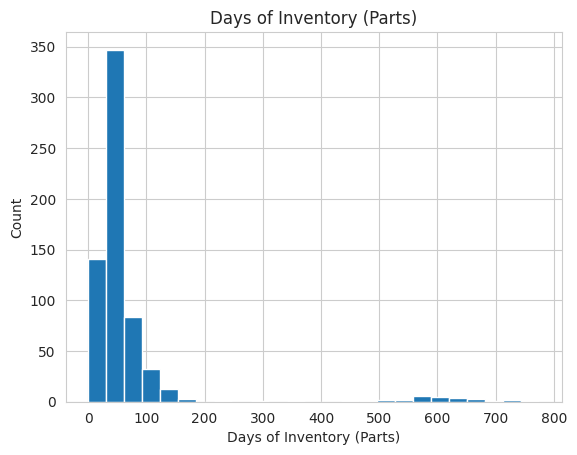

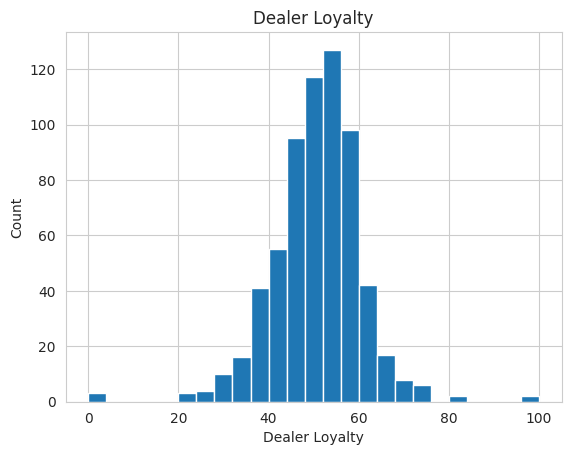

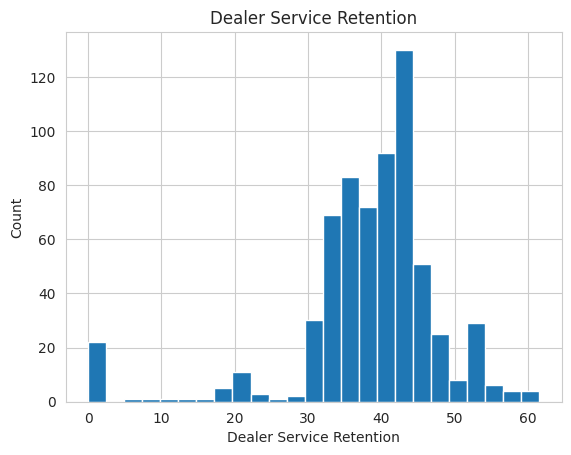

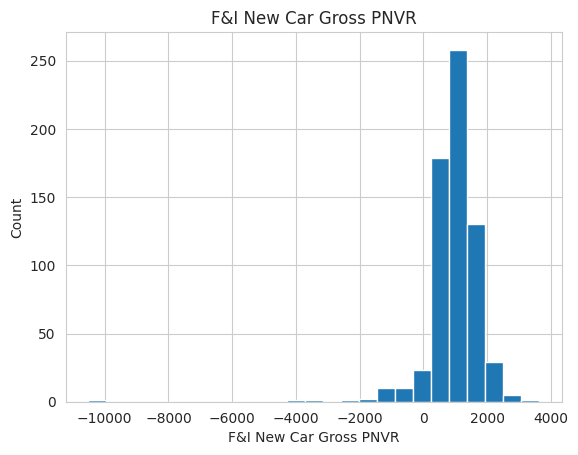

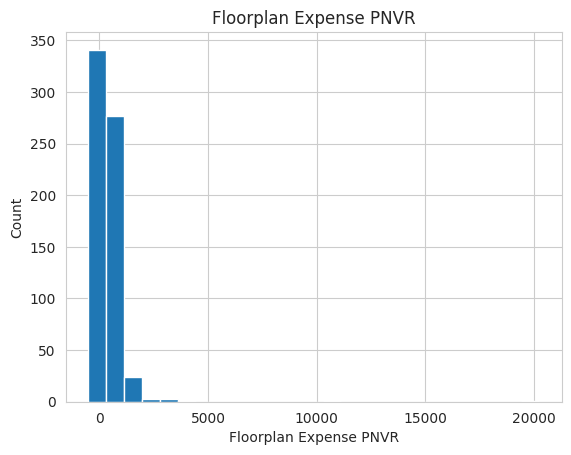

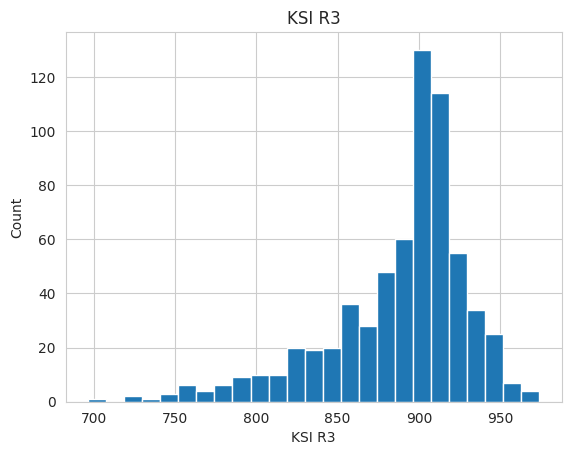

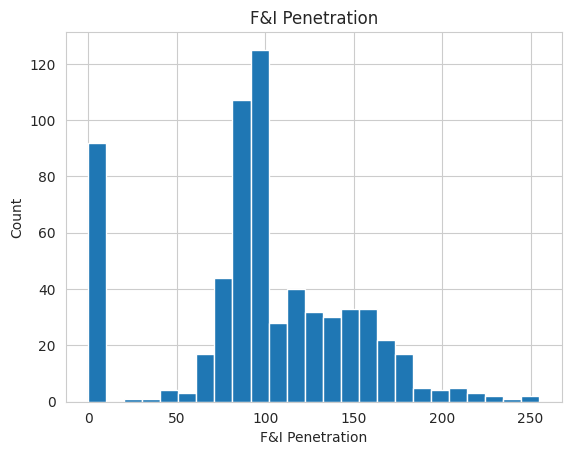

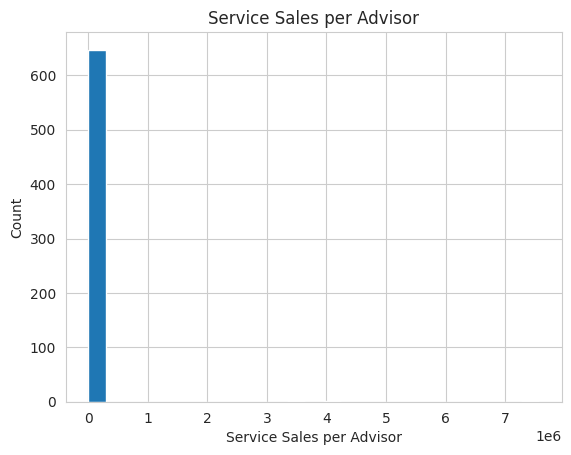

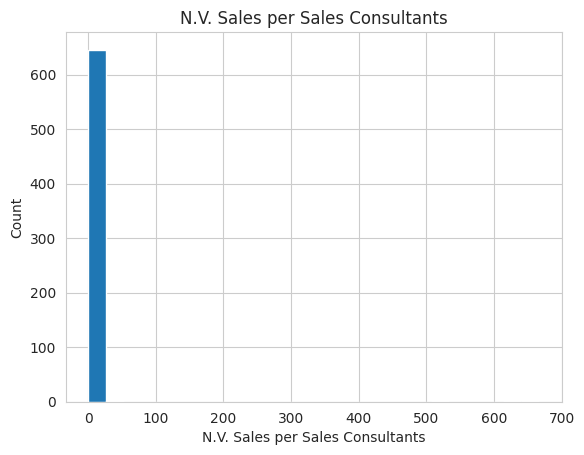

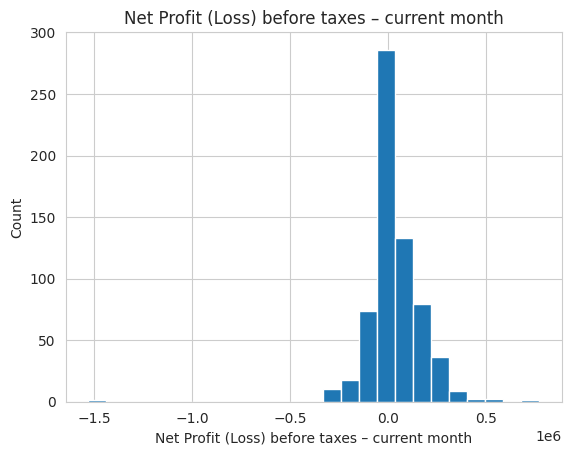

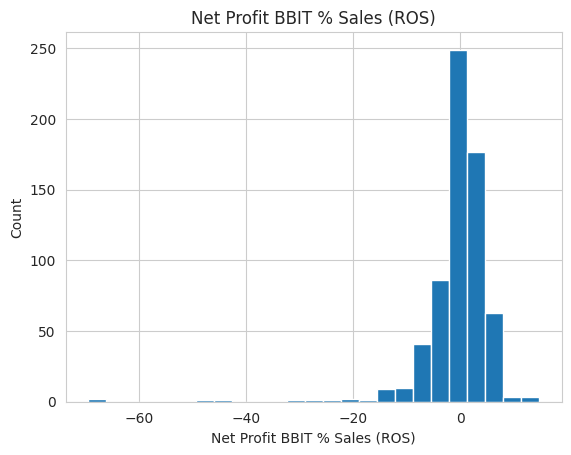

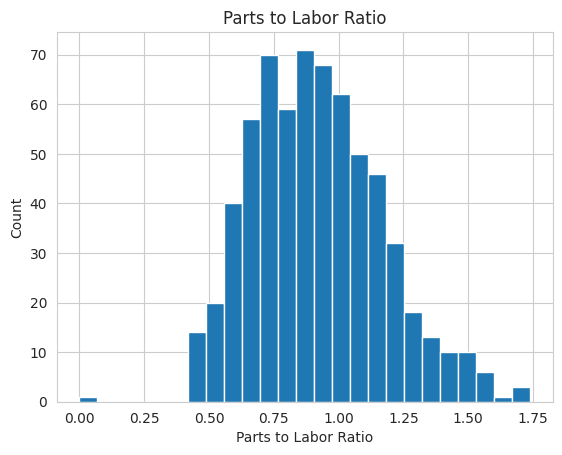

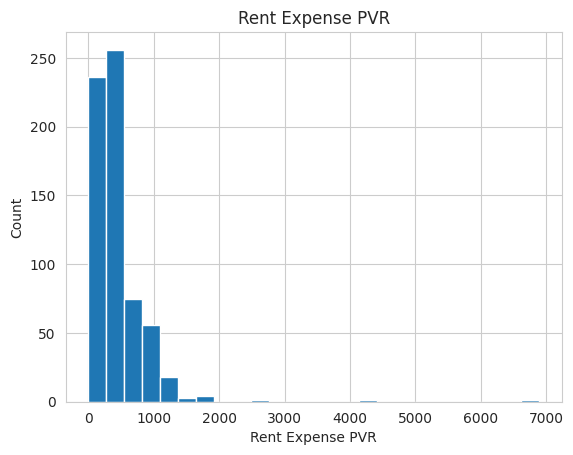

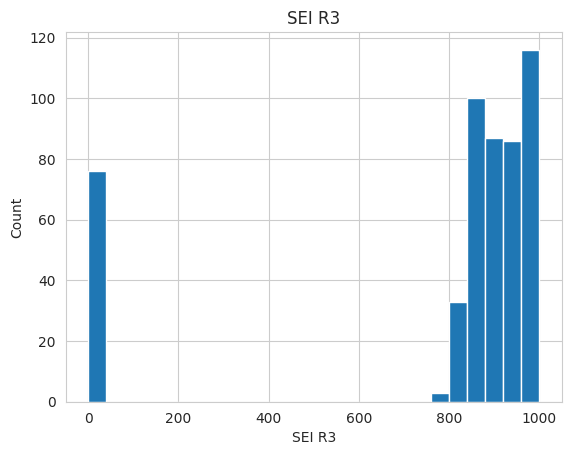

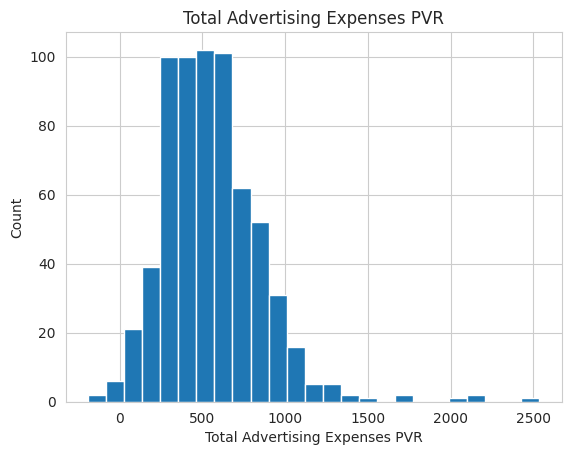

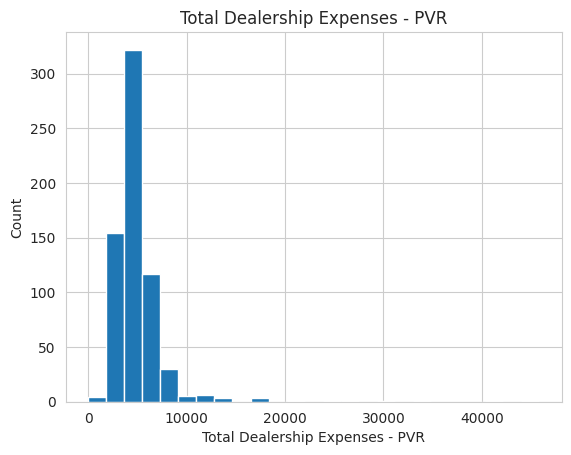

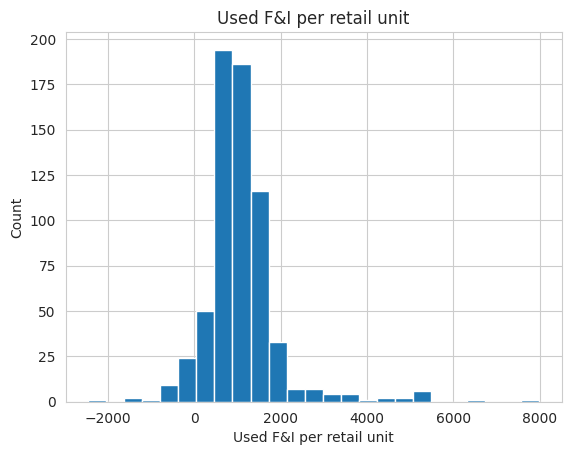

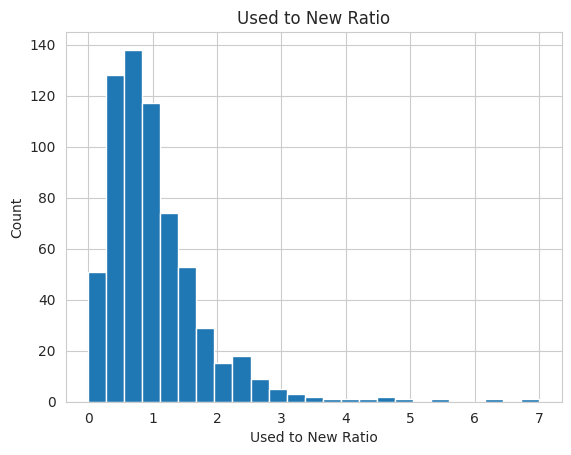

In [11]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

**Detection of outliers in the dataset using boxplot method**



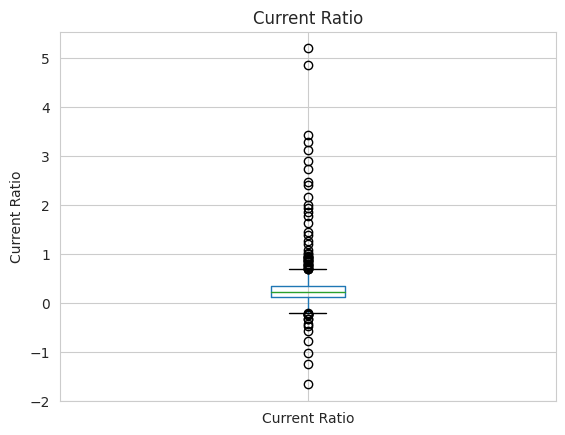

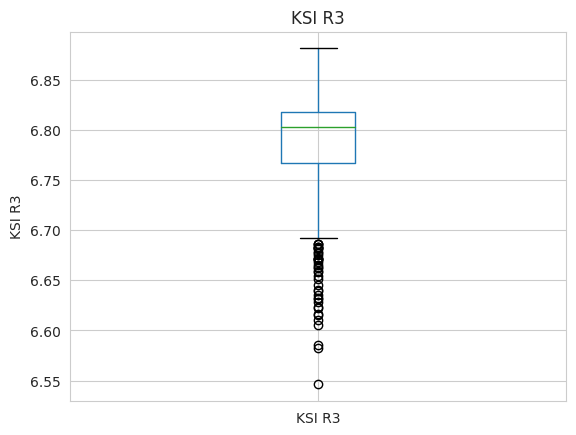

In [12]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

**Number of categories in each categorical feature**

In [13]:
for feature in cat_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is DealerCode and number of categories are 25
The feature is Date and number of categories are 39
The feature is VolumnGrp and number of categories are 7
The feature is operationaldate and number of categories are 26
The feature is TerminationDate and number of categories are 9
The feature is Is the Dealer at Risk? and number of categories are 2


**Missing numerical features in the dataset**

In [14]:
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

Dealer Loyalty: 0.0092% missing value
SEI R3: 0.2316% missing value


**Replacing the missing values with the mean of the values contained in that column**

In [15]:
for feature in numerical_with_nan:
    median_value=df[feature].mean()

    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)

df[numerical_with_nan].isnull().sum()

,0
Dealer Loyalty,0
SEI R3,0


**Missing categorical variables in the dataset**

In [16]:
cat_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in cat_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

VolumnGrp: 0.0383% missing value
TerminationDate: 0.704% missing value


**Filling the categorical missing values in the dataset with the most frequently occuring variable in that column**

In [17]:
df['VolumnGrp'].fillna(df['VolumnGrp'].mode()[0],inplace=True)

In [18]:
df[cat_with_nan].isnull().sum()

,0
VolumnGrp,0
TerminationDate,459


**Encoding the categorical variables in order to apply mathematical operations on that variables efficiently in future so here we encoding both categorical variables in independent features as well as dependent features**

In [19]:
label_encoder = LabelEncoder()
df['VolumnGrp']= label_encoder.fit_transform(df['VolumnGrp'])
lc_2 = LabelEncoder()
df['Is the Dealer at Risk?'] = lc_2.fit_transform(df['Is the Dealer at Risk?'])
df

,DealerCode,Date,% Customer Pay Service,Current Ratio,Days Supply - New Vehicle,Days of Inventory (Parts),Dealer Loyalty,Dealer Service Retention,F&I New Car Gross PNVR,Floorplan Expense PNVR,...,Total Advertising Expenses PVR,Total Dealership Expenses - PVR,Used F&I per retail unit,Used to New Ratio,VolumnGrp,operationaldate,TerminationDate,Is the Dealer at Risk?,Dealer Loyaltynan,SEI R3nan
0,Dealer1,1/1/2018,32.29,1.67,114.41,116.05,58.27,53.20,1269.14,355.88,...,537.96,5417.65,721.52,0.50,2,7/1/1997,NaN,0,0,0
1,Dealer1,1/2/2018,45.87,1.66,199.71,126.01,57.41,53.69,1308.89,532.91,...,664.14,7534.28,567.04,0.90,2,7/1/1997,NaN,1,0,0
2,Dealer1,1/3/2018,42.89,1.71,106.07,109.95,57.65,53.33,1677.82,470.28,...,586.99,7317.52,930.59,0.68,2,7/1/1997,NaN,1,0,0
3,Dealer1,1/4/2018,52.90,1.77,151.67,113.68,55.47,52.75,1152.25,354.66,...,556.72,6395.38,-55.91,0.50,3,7/1/1997,NaN,1,0,0
4,Dealer1,1/5/2018,45.78,1.85,108.37,101.80,54.93,47.19,992.67,332.90,...,563.96,5781.98,254.60,0.33,3,7/1/1997,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,Dealer23,1/11/2019,54.79,1.65,135.00,50.86,59.09,50.11,-1002.00,-481.02,...,604.12,4672.59,1199.30,1.39,5,10/1/2010,NaN,0,0,0
648,Dealer23,1/12/2019,41.85,1.76,48.46,55.26,57.69,50.21,-603.31,-288.85,...,415.81,4601.69,1076.89,0.60,5,10/1/2010,NaN,0,0,0
649,Dealer23,1/1/2020,56.55,1.51,96.67,52.19,60.00,49.79,-290.44,-55.29,...,535.47,6104.75,1308.84,1.38,5,10/1/2010,NaN,0,0,0
650,Dealer23,1/2/2020,38.02,1.64,90.00,61.97,53.57,49.37,-582.60,-67.79,...,671.12,4950.74,1225.78,1.00,5,10/1/2010,NaN,0,0,0


**Mean Encoding of independent cateorical feature VolumnGrp which is actually the Grouping by Sales Volume**

*   Capture information within the label, therefore rendering more predictive features
*   Creates a monotonic relationship between the variable and the target
*   Does not expand the feature space

**Montonicity** : Monotonicity
All these methods create a monotonic relationship between the categorical variable and the target. A monotonic relationship is a relationship that does one of the following:
* As the value of one variable increases, so does the value of the other variable
* As the value of one variable increases, the other variable value decreases. In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target decreases.





In [20]:
df['VolumnGrp'] = df.VolumnGrp.map(df.groupby(['VolumnGrp'])['Is the Dealer at Risk?'].mean().to_dict())

**Dropping of irrelevant features**

In [21]:
feature_scale=[feature for feature in df.columns if feature not in ['Date','Is the Dealer at Risk?','operationaldate','TerminationDate','DealerCode']]
feature_scale

['% Customer Pay Service',
 'Current Ratio',
 'Days Supply - New Vehicle',
 'Days of Inventory (Parts)',
 'Dealer Loyalty',
 'Dealer Service Retention',
 'F&I New Car Gross PNVR',
 'Floorplan Expense PNVR',
 'KSI R3',
 'F&I Penetration',
 'Service Sales per Advisor',
 'N.V. Sales per Sales Consultants',
 'Net Profit (Loss) before taxes – current month',
 'Net Profit BBIT % Sales (ROS)',
 'Parts to Labor Ratio',
 'Rent Expense PVR',
 'SEI R3',
 'Total Advertising Expenses PVR',
 'Total Dealership Expenses - PVR',
 'Used F&I per retail unit',
 'Used to New Ratio',
 'VolumnGrp',
 'Dealer Loyaltynan',
 'SEI R3nan']

**Feature Scaling**

*   As we earlier went through the distribution of continous variables in the dataset.
*   They does not follow Normal or Gaussian distribution so we decided to proceed in feature Scaling with **Normalization**.
*   With normalization we scale the values between 0 and 1.



In [22]:
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [23]:
data = pd.concat([df[["Is the Dealer at Risk?"]].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [24]:
data = data[~data.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

**Seperation of independent and dependent variables**

In [25]:
y_train=data[['Is the Dealer at Risk?']]
X_train=data.drop(['Is the Dealer at Risk?'],axis=1)
y_train

,Is the Dealer at Risk?
0,0
1,1
2,1
3,1
4,1
...,...
647,0
648,0
649,0
650,0


In [26]:
X_train

,% Customer Pay Service,Current Ratio,Days Supply - New Vehicle,Days of Inventory (Parts),Dealer Loyalty,Dealer Service Retention,F&I New Car Gross PNVR,Floorplan Expense PNVR,KSI R3,F&I Penetration,...,Parts to Labor Ratio,Rent Expense PVR,SEI R3,Total Advertising Expenses PVR,Total Dealership Expenses - PVR,Used F&I per retail unit,Used to New Ratio,VolumnGrp,Dealer Loyaltynan,SEI R3nan
0,0.408321,0.008215,0.015134,0.149798,0.5827,0.864478,0.832898,0.041714,0.403964,0.312588,...,0.580460,0.145160,0.964100,0.267265,0.118258,0.304697,0.071429,0.000000,0.0,0.0
1,0.580046,0.008159,0.026417,0.162654,0.5741,0.872441,0.835706,0.050249,0.311351,0.369997,...,0.505747,0.195134,0.956300,0.313553,0.164461,0.289910,0.128571,0.000000,0.0,0.0
2,0.542362,0.008437,0.014030,0.141924,0.5765,0.866591,0.861773,0.047229,0.261261,0.350377,...,0.591954,0.143411,0.940300,0.285252,0.159729,0.324711,0.097143,0.000000,0.0,0.0
3,0.668943,0.008770,0.020062,0.146739,0.5547,0.857166,0.824639,0.041655,0.335135,0.305211,...,0.505747,0.205227,0.940000,0.274147,0.139601,0.230277,0.071429,0.156013,0.0,0.0
4,0.578907,0.009214,0.014335,0.131404,0.5493,0.766818,0.813363,0.040606,0.447928,0.312314,...,0.545977,0.201749,0.774635,0.276803,0.126211,0.260001,0.047143,0.156013,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,0.692843,0.008104,0.017857,0.065650,0.5909,0.814267,0.672429,0.001367,0.696577,0.000000,...,0.402299,0.104377,0.918520,0.291536,0.101995,0.350433,0.198571,1.000000,0.0,0.0
648,0.529211,0.008714,0.006410,0.071330,0.5769,0.815892,0.700599,0.010631,0.761802,0.000000,...,0.425287,0.136994,0.911940,0.222456,0.100447,0.338715,0.085714,1.000000,0.0,0.0
649,0.715099,0.007327,0.012787,0.067367,0.6000,0.809067,0.722705,0.021891,0.708829,0.000000,...,0.568966,0.139909,0.896670,0.266352,0.133257,0.360919,0.197143,1.000000,0.0,0.0
650,0.480779,0.008048,0.011905,0.079991,0.5357,0.802242,0.702062,0.021289,0.744865,0.000000,...,0.436782,0.119559,1.000000,0.316114,0.108066,0.352968,0.142857,1.000000,0.0,0.0


**Feature Selection**



*   As we've numerical input and categorical output so the two best techniques to find the correlation are ANNOVA test and Mutual Information.
*   On proceeding with ANNOVA test the best features found unabled the model to serve with atmost accuracy.
*   So we proceeded with Mutual Information with the help of which performance was slightly better



In [27]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.00559723, 0.04056886, 0.06425873, 0.0632899 , 0.06426111,
       0.12365305, 0.05299163, 0.09522123, 0.0258832 , 0.0516017 ,
       0.0300661 , 0.0164196 , 0.28184694, 0.2630823 , 0.02287831,
       0.07935135, 0.02873899, 0.05486535, 0.06190496, 0.02148974,
       0.05152384, 0.04939353, 0.02877654, 0.03495196])

In [28]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

,0
Net Profit (Loss) before taxes – current month,0.281847
Net Profit BBIT % Sales (ROS),0.263082
Dealer Service Retention,0.123653
Floorplan Expense PNVR,0.095221
Rent Expense PVR,0.079351
Dealer Loyalty,0.064261
Days Supply - New Vehicle,0.064259
Days of Inventory (Parts),0.063290
Total Dealership Expenses - PVR,0.061905
Total Advertising Expenses PVR,0.054865


**The best features found was the Net Profit and Profit before taxes which played a signifcant role in claiming that whether Dealer is at risk or not**

<Axes: >

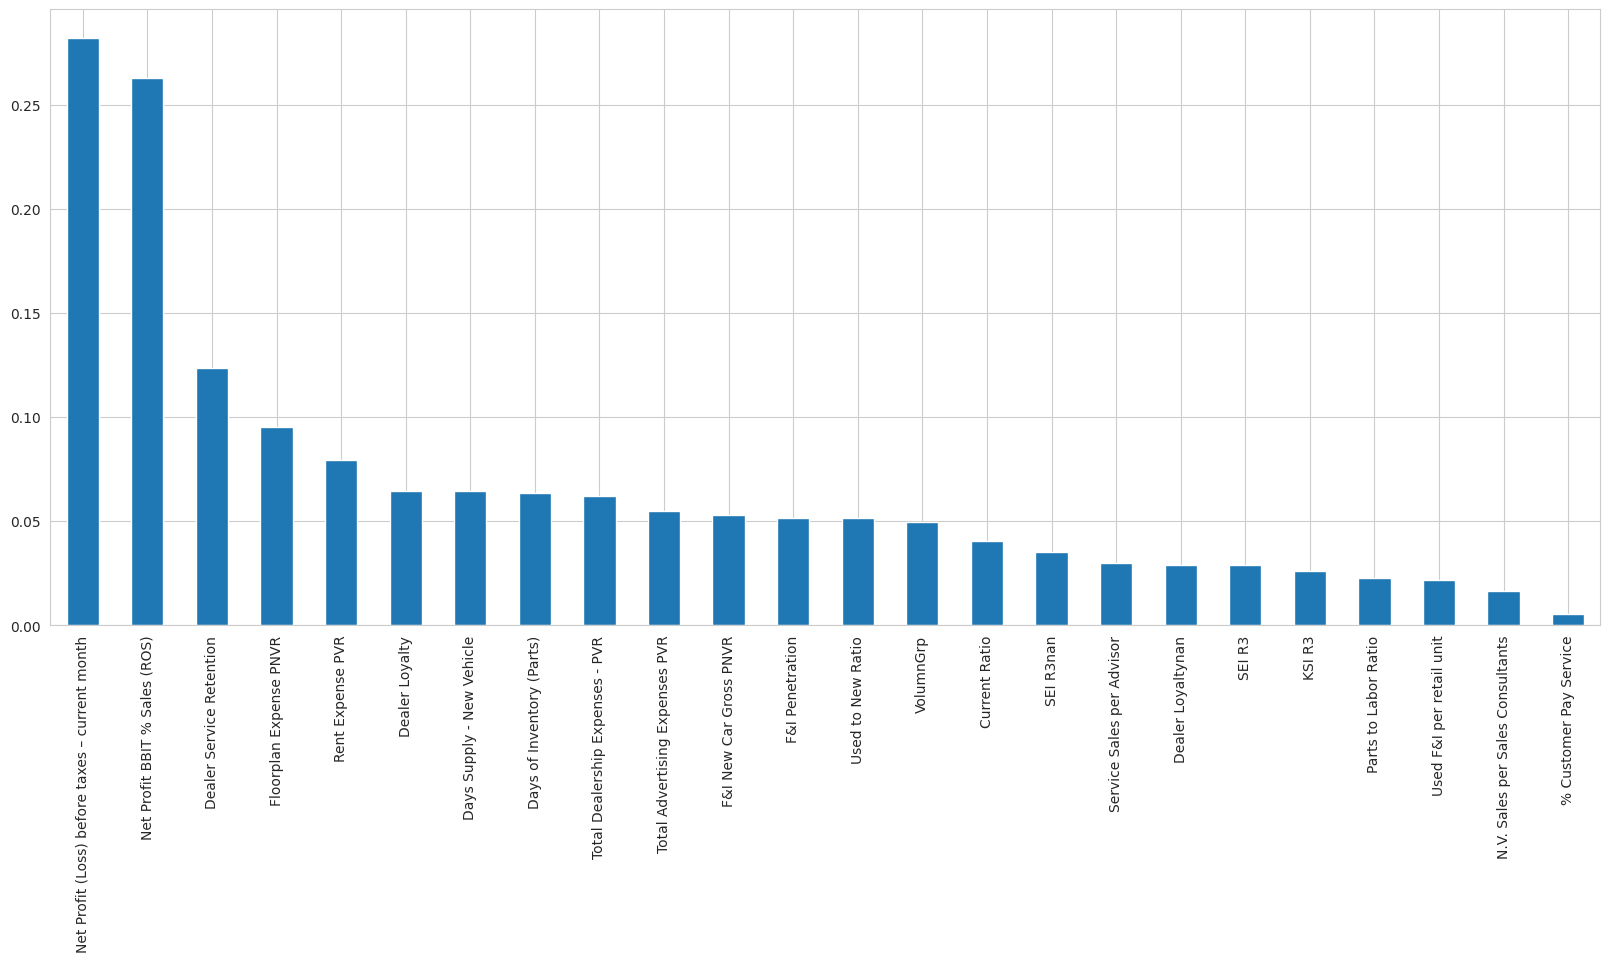

In [29]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

**After lot of experimentations with selection of top 2 or top5 or top 10 features in the dataset which plays a sgnificant role in prediction we've found the selection of top 2 features is the right fit which makes our model more faster and helps in efficient learning with best accuracy during prediction**

In [30]:
sel_two_cols = SelectKBest(mutual_info_classif, k=2)
sel_two_cols.fit(X_train, y_train)
X_train.columns[sel_two_cols.get_support()]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['Net Profit (Loss) before taxes – current month', 'Net Profit BBIT % Sales (ROS)'], dtype='object')

In [31]:
X_train = X_train[X_train.columns[sel_two_cols.get_support()]]
X_train

,Net Profit (Loss) before taxes – current month,Net Profit BBIT % Sales (ROS)
0,0.666593,0.826252
1,0.624494,0.804059
2,0.657944,0.821149
3,0.656261,0.820081
4,0.674957,0.829456
...,...,...
647,0.754494,0.913363
648,0.780160,0.923451
649,0.714791,0.889983
650,0.720184,0.880252



**Handling Imbalanced Dataset**

*   As according to the earlier visualization, the dataset was found to be be imbalanced.

*   To deal with imbalanced dataset we've two popular techniques i.e., Random Under-Sampling and Random Over-Sampling.

*   The model performance was not well with Random under-sampling as comes with the idea of randomly eliminating majority class examples and this is done until the majority and minority class instances are balanced out due to which model didn't get sufficient data for training properly and came up with low accuracy.

*   Therefore we proceeded with Random over sampling which increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of minority class in the sample and model performance was also improved as it got more data for training.






In [32]:
#Over Sampling
state = np.random.RandomState(42)
X = X_train
Y = y_train
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,Y)

**Testing with Multiple Machine Learning Models**


*   We trained data on multiple machine learning models.
*   Random Forest Classifier came up with maximum accuracy so we decided to proceed with Random Forest by improving it to get atmost accuracy.



In [33]:
model = []
model.append(("Logistic Regression",LogisticRegression()))
model.append(("Random Forest",RandomForestClassifier()))
model.append(("Gradient Boosting Classifier",GradientBoostingClassifier()))
model.append(("Decision Tree",DecisionTreeClassifier()))
model.append(("Naive Bayes",GaussianNB()))
model.append(("K-Nearest Neighbors",KNeighborsClassifier()))
model.append(("Support Vector Classifier",SVC()))
model.append(("XGBoost Classifier",XGBClassifier()))

In [34]:
for mod,clf in model:
  scores = cross_val_score(clf,X_res,y_res,scoring = "accuracy",cv = 10)
  print("Model is %s and score %f"%(mod,scores.mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Model is Logistic Regression and score 0.858000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Model is Random Forest and score 0.888754


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Model is Gradient Boosting Classifier and score 0.880702
Model is Decision Tree and score 0.864912
Model is Naive Bayes and score 0.855333


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Model is K-Nearest Neighbors and score 0.863491


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Model is Support Vector Classifier and score 0.854070
Model is XGBoost Classifier and score 0.880772


**We splitted the data to training set and test set**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=0,test_size = 0.25)

**Hyperparameter Tuning :**
We decided to use RandomizedSearchCV to pick up the best parameters for our machine learning model over GridSearchCV in which there is no need to provide a discrete set of values to explore for each hyperparameter instead we provide a statistical distribution for each hyperparameter from which values are randomly sampled and set the total number of explosions we want to buy.


In [36]:
est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [37]:
rf_parameters

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [44]:
classifier = RandomForestClassifier(bootstrap= True,
 criterion='gini',
 max_depth= 5,
 max_features= 2,
 min_samples_leaf= 2,
 n_estimators= 100)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, max_features=2, min_samples_leaf=2)

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[78 12]
 [11 88]]


In [47]:
accuracies = cross_val_score(classifier, X = X_train, y = y_train, cv=10, scoring="accuracy")
print(accuracies.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

0.8671992481203008


**What can be done to further improve performance?**


*   Feeding the machine learning model with more data just like we saw earlier using random oversampling which ultimately increased the data which helped the model to learn better due to which model performed absolutely amazing and came up with better accuracy.

*   As when dealing with tons of data weaker model will not perform well so we need more complex model which can better understand the complexities in the data.

*   Having good model and more quantity of data will not let you master the game so before proceeding into model training one should must focus on the quality of data that is to be provided to the machine learning model and check whether is it really in the form where a machine learning model can easily learn and get understanding and perform well so feature engineering is the most significant part above all.

*   Hyperparamter tuning is a very important job so with full patience one should spend a lot of time in performing multiple expermentions we should tune up our machine learning to make it as best as possible so it should come with atmost accuracy and perform well.


